In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import geopandas as gpd

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

# 1. Data Loading

In [7]:
data1 = gpd.read_file('../data/전처리 파일/부평구 도로_5181/도로통합도/3. 기초구역별 도로통합도/기초구역별 통합도 집계 전/destination/기초구역별_도로통합도_des_5181.shp',encoding='euc-kr')
data2 = gpd.read_file('../data/전처리 파일/부평구 도로_5181/도로통합도/3. 기초구역별 도로통합도/기초구역별 통합도 집계 전/start/기초구역별_도로통합도/기초구역별_도로통합도_st_5181.shp',encoding='euc-kr')
data1.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,...,Line Lengt,Mean Depth,Mean Dep_1,Mean Dep_2,Mean Dep_3,Node Count,Node Cou_1,Node Cou_2,Node Cou_3,geometry
0,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,11.197011,262.89813,1.500000,2.00,3.000000,30033.0,3.0,4.0,6.0,"POLYGON ((176641.304 442645.152, 176647.527 44..."
1,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,55.040844,261.89816,1.333333,1.75,2.666667,30033.0,4.0,5.0,7.0,"POLYGON ((176641.304 442645.152, 176647.527 44..."
2,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,82.799423,260.89828,1.500000,1.80,2.571429,30033.0,5.0,6.0,8.0,"POLYGON ((176641.304 442645.152, 176647.527 44..."
3,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,54.724506,259.89844,1.500000,2.00,2.625000,30033.0,5.0,7.0,9.0,"POLYGON ((176641.304 442645.152, 176647.527 44..."
4,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,...,45.036148,258.89868,1.500000,2.00,2.777778,30033.0,5.0,7.0,10.0,"POLYGON ((176641.304 442645.152, 176647.527 44..."


## 1.1 필요데이터
- BAS_AR : 기초구역 넓이(m^2)
- BAS_ID : 기초구역 번호
- 'Ref', 'x1', 'y1', 'x2', 'y2'
- Connectivi', 'Integratio', 'Integrat_1', 'Integrat_2', 'Integrat_3', 'Integrat_4'
  ,'Integrat_5','Integrat_6', 'Integrat_7', 'Line Lengt'

In [8]:
data1.columns

Index(['BAS_AR', 'BAS_ID', 'BAS_MGT_SN', 'CTP_KOR_NM', 'MVMN_DE', 'MVMN_RESN',
       'NTFC_DE', 'OPERT_DE', 'SIG_CD', 'SIG_KOR_NM', 'Ref', 'x1', 'y1', 'x2',
       'y2', 'Con', 'IntHH', 'IntHH_R2', 'IntHH_R3', 'IntHH_R5', 'IntTekl',
       'IntTekl_R2', 'IntTekl_R3', 'IntTekl_R5', 'Line Lengt', 'Mean Depth',
       'Mean Dep_1', 'Mean Dep_2', 'Mean Dep_3', 'Node Count', 'Node Cou_1',
       'Node Cou_2', 'Node Cou_3', 'geometry'],
      dtype='object')

In [9]:
essential_col = ['BAS_AR','BAS_ID','Ref','x1','y1','x2','y2','Con','IntHH','IntHH_R2','IntHH_R3','IntHH_R5',
                 'IntTekl','IntTekl_R2','IntTekl_R3','IntTekl_R5','Line Lengt','geometry']
use_data1 = data1[essential_col]
use_data2 = data2[essential_col]
use_data1.head()

,BAS_AR,BAS_ID,Ref,x1,y1,x2,y2,Con,IntHH,IntHH_R2,IntHH_R3,IntHH_R5,IntTekl,IntTekl_R2,IntTekl_R3,IntTekl_R5,Line Lengt,geometry
0,2.648838,21459,3252.0,178257.5637,440686.2504,178259.6734,440697.2469,1.0,0.046926,0.210897,0.333333,0.349023,0.605672,-1.000000,0.000000,0.301030,11.197011,"POLYGON ((176641.304 442645.152, 176647.527 44..."
1,2.648838,21459,3253.0,178259.6734,440697.2469,178268.7774,440751.5296,2.0,0.047106,1.000000,0.703987,0.509474,0.605818,-1.000000,0.369070,0.397940,55.040844,"POLYGON ((176641.304 442645.152, 176647.527 44..."
2,2.648838,21459,3254.0,178268.7774,440751.5296,178279.1790,440833.6731,2.0,0.047287,1.055981,0.872556,0.626884,0.605964,0.584962,0.500000,0.458157,82.799423,"POLYGON ((176641.304 442645.152, 176647.527 44..."
3,2.648838,21459,3255.0,178279.1790,440833.6731,178283.8521,440888.1977,2.0,0.047470,1.055981,0.849123,0.682325,0.606111,0.584962,0.511392,0.488416,54.724506,"POLYGON ((176641.304 442645.152, 176647.527 44..."
4,2.648838,21459,3256.0,178283.8521,440888.1977,178284.3284,440933.2313,2.0,0.047654,1.055981,0.849123,0.687500,0.606259,0.584962,0.511392,0.500000,45.036148,"POLYGON ((176641.304 442645.152, 176647.527 44..."


In [10]:
use_data1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29635 entries, 0 to 29634
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BAS_AR      29635 non-null  float64 
 1   BAS_ID      29635 non-null  object  
 2   Ref         29634 non-null  float64 
 3   x1          29634 non-null  float64 
 4   y1          29634 non-null  float64 
 5   x2          29634 non-null  float64 
 6   y2          29634 non-null  float64 
 7   Con         29634 non-null  float64 
 8   IntHH       29634 non-null  float64 
 9   IntHH_R2    29634 non-null  float64 
 10  IntHH_R3    29634 non-null  float64 
 11  IntHH_R5    29634 non-null  float64 
 12  IntTekl     29634 non-null  float64 
 13  IntTekl_R2  29634 non-null  float64 
 14  IntTekl_R3  29634 non-null  float64 
 15  IntTekl_R5  29634 non-null  float64 
 16  Line Lengt  29634 non-null  float64 
 17  geometry    29635 non-null  geometry
dtypes: float64(16), geometry(1), object(1)

In [11]:
use_data1 = use_data1.rename(columns={'Line Lengt':'LL'})
use_data2 = use_data2.rename(columns={'Line Lengt':'LL'})
use_data1.columns

Index(['BAS_AR', 'BAS_ID', 'Ref', 'x1', 'y1', 'x2', 'y2', 'Con', 'IntHH',
       'IntHH_R2', 'IntHH_R3', 'IntHH_R5', 'IntTekl', 'IntTekl_R2',
       'IntTekl_R3', 'IntTekl_R5', 'LL', 'geometry'],
      dtype='object')

RI : Road Integration

In [12]:
new_col = ['IntHH_RI','IntHH_R2_RI','IntHH_R3_RI','IntHH_R5_RI','IntTekl_RI','IntTekl_R2_RI'
            ,'IntTekl_R3_RI','IntTekl_R5_RI']
use_col = ['IntHH','IntHH_R2','IntHH_R3','IntHH_R5','IntTekl','IntTekl_R2','IntTekl_R3','IntTekl_R5']
df_list = [use_data1,use_data2]

for i in range(len(df_list)):
    for idx in range(len(new_col)):
        df_list[i][new_col[idx]] = df_list[i][use_col[idx]]*df_list[i]['LL']

display(df_list[0].iloc[:,18:])

,IntHH_RI,IntHH_R2_RI,IntHH_R3_RI,IntHH_R5_RI,IntTekl_RI,IntTekl_R2_RI,IntTekl_R3_RI,IntTekl_R5_RI
0,0.525431,2.361414,3.732337,3.908009,6.781711,-11.197011,0.000000,3.370636
1,2.592747,55.040844,38.748058,28.041865,33.344710,-55.040844,20.313937,21.902954
2,3.915345,87.434617,72.247156,51.905637,50.173479,48.434557,41.399712,37.935128
3,2.597757,57.788039,46.467833,37.339886,33.169144,32.011783,27.985652,26.728338
4,2.146141,47.557317,38.241226,30.962352,27.303578,26.344457,23.031107,22.518074
...,...,...,...,...,...,...,...,...
29630,1.276734,30.809296,24.774007,19.358637,17.593665,17.066863,14.920358,14.648490
29631,2.179543,10.541538,21.113010,23.335383,30.134772,-49.984348,12.592539,21.266714
29632,0.117316,4.423231,3.300468,2.255457,1.573464,2.172341,1.676815,1.458412
29633,0.394498,9.282665,7.464267,5.832647,5.309268,5.142148,4.495419,4.413506


In [13]:
use_data1.columns

Index(['BAS_AR', 'BAS_ID', 'Ref', 'x1', 'y1', 'x2', 'y2', 'Con', 'IntHH',
       'IntHH_R2', 'IntHH_R3', 'IntHH_R5', 'IntTekl', 'IntTekl_R2',
       'IntTekl_R3', 'IntTekl_R5', 'LL', 'geometry', 'IntHH_RI', 'IntHH_R2_RI',
       'IntHH_R3_RI', 'IntHH_R5_RI', 'IntTekl_RI', 'IntTekl_R2_RI',
       'IntTekl_R3_RI', 'IntTekl_R5_RI'],
      dtype='object')

# 2. 데이터 전처리

In [14]:
Int_list = use_data1.columns[18:]
avg_Int_list = use_data1.columns[8:16]
avg_Int_list
Int_list

Index(['IntHH_RI', 'IntHH_R2_RI', 'IntHH_R3_RI', 'IntHH_R5_RI', 'IntTekl_RI',
       'IntTekl_R2_RI', 'IntTekl_R3_RI', 'IntTekl_R5_RI'],
      dtype='object')

In [17]:
sum_of_integration_by_bi1 = use_data1.groupby('BAS_ID')[Int_list].sum().reset_index()
sum_of_integration_by_bi2 = use_data2.groupby('BAS_ID')[Int_list].sum().reset_index()
avg_of_integration_by_bi1 = use_data1.groupby('BAS_ID')[avg_Int_list].mean().reset_index()
avg_of_integration_by_bi2 = use_data2.groupby('BAS_ID')[avg_Int_list].mean().reset_index()

display(sum_of_integration_by_bi1.head())
display(avg_of_integration_by_bi2.head())

,BAS_ID,IntHH_RI,IntHH_R2_RI,IntHH_R3_RI,IntHH_R5_RI,IntTekl_RI,IntTekl_R2_RI,IntTekl_R3_RI,IntTekl_R5_RI
0,21300,577.853208,9104.257303,7337.753539,5798.557907,4924.972983,2812.997559,3965.556094,4117.201561
1,21301,188.547340,3087.456290,2470.067113,1925.595778,1574.004687,1533.621981,1391.794893,1362.343601
2,21302,298.889400,4442.788250,3532.751414,2761.022634,2133.350641,2016.727470,1897.770614,1884.275830
3,21303,409.526959,6691.973980,5217.699394,4075.328125,2931.621290,2699.004208,2681.084606,2664.234468
4,21304,181.801396,2853.942103,2202.910835,1703.659839,1225.259301,1269.314777,1132.867910,1105.919030


,BAS_ID,IntHH,IntHH_R2,IntHH_R3,IntHH_R5,IntTekl,IntTekl_R2,IntTekl_R3,IntTekl_R5
0,21300,0.059048,1.147444,0.912078,0.711240,0.607237,0.494567,0.512447,0.512580
1,21301,0.069301,1.181025,0.931770,0.720794,0.620758,0.625255,0.538520,0.524236
2,21302,0.087830,1.396703,1.072886,0.821374,0.630483,0.676120,0.579197,0.559293
3,21303,0.087268,1.417584,1.096087,0.849728,0.630227,0.594430,0.572415,0.564339
4,21304,0.092658,1.361346,1.065534,0.827553,0.632758,0.650119,0.574040,0.558953


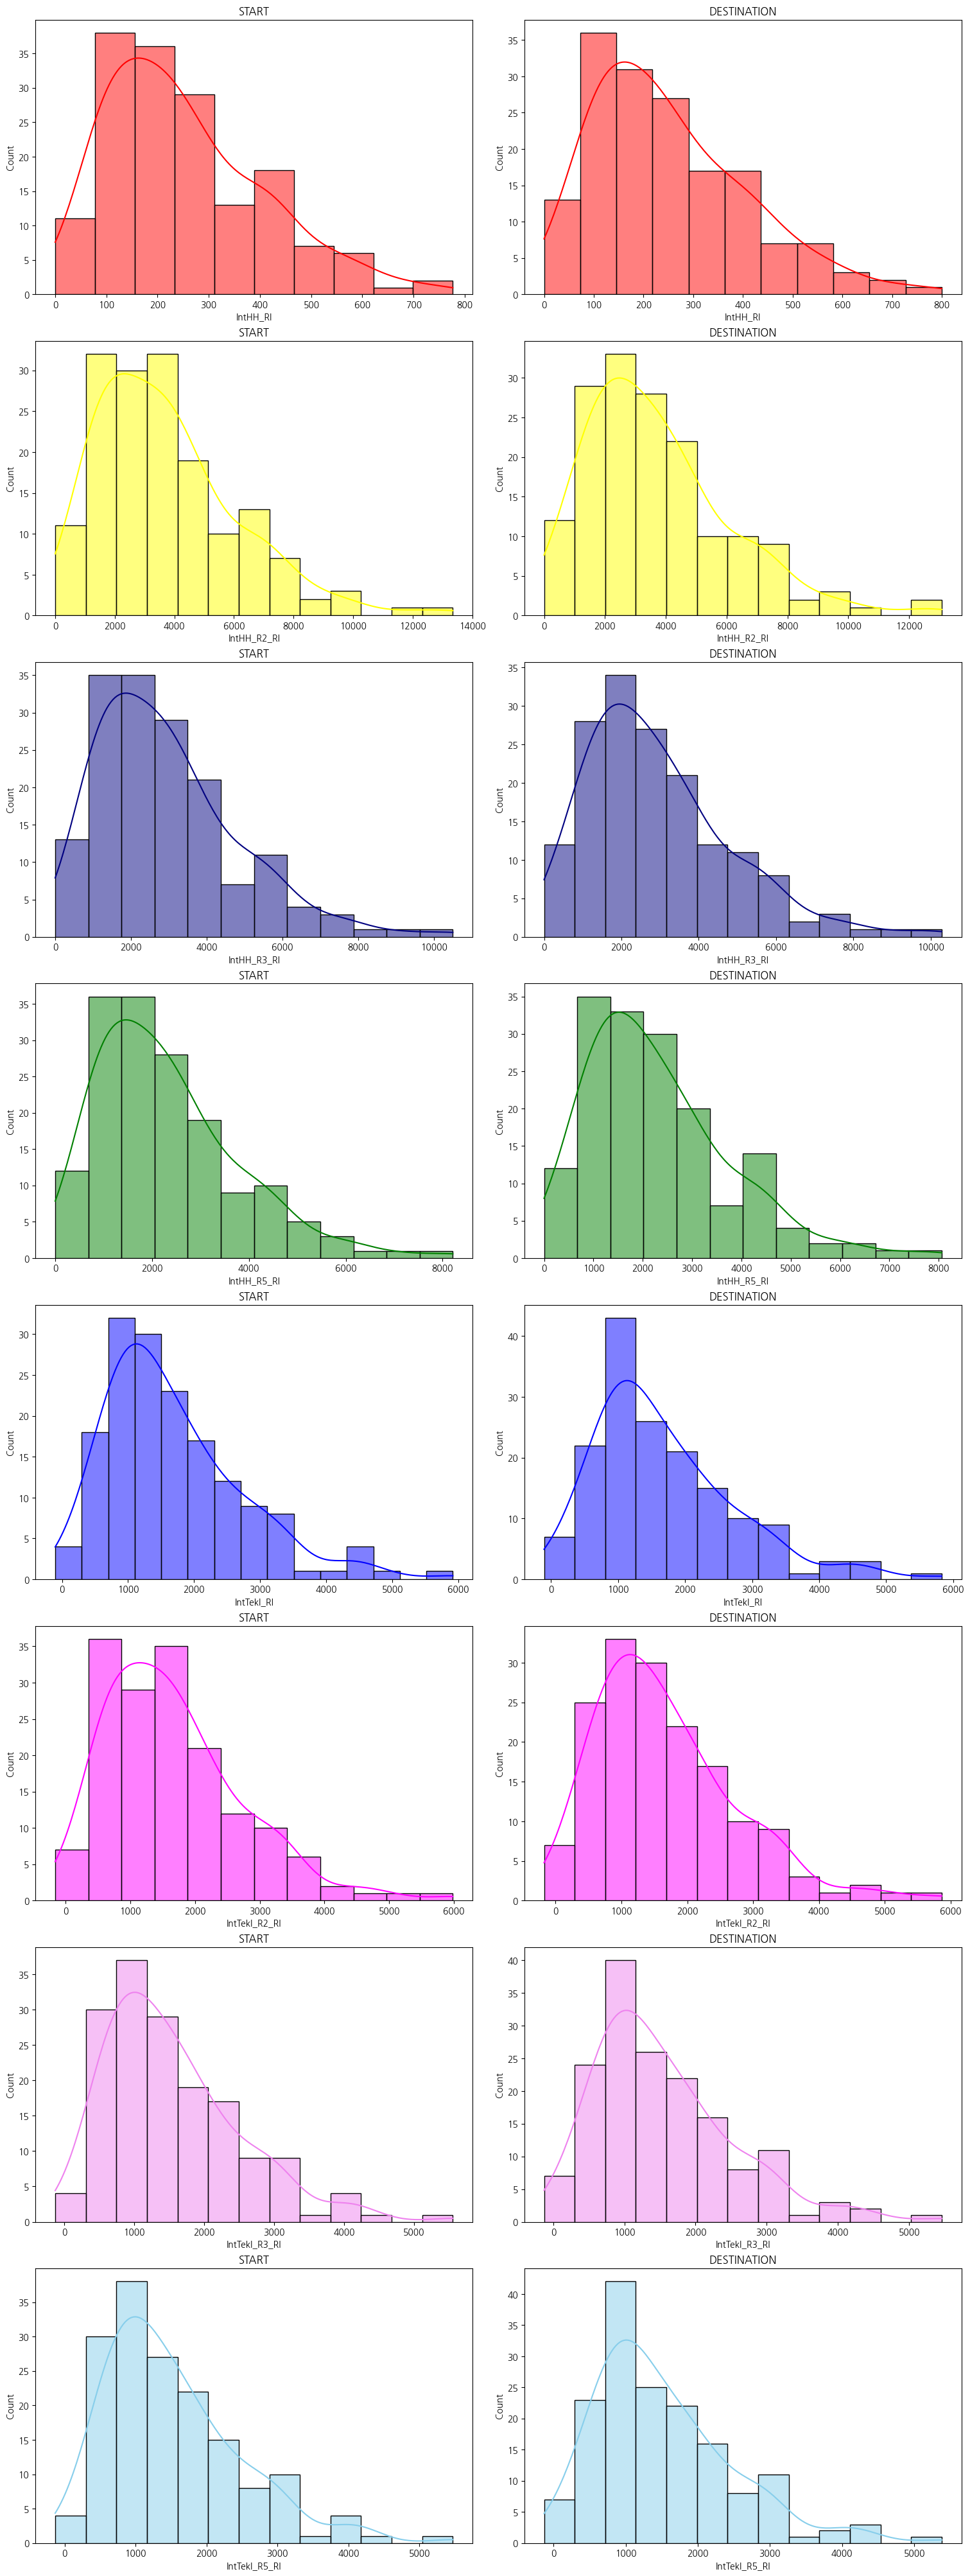

In [18]:
fig, axes = plt.subplots(len(Int_list),2,figsize=(15,40),constrained_layout=True)
color = ['red','yellow','navy','green','blue','magenta','violet','skyblue']

for idx, col in enumerate(Int_list):
    sns.histplot(ax=axes[idx,0],data=sum_of_integration_by_bi1, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,1],data=sum_of_integration_by_bi2, x=col, kde=True,color=color[idx])
    axes[idx,0].set_title('START')
    axes[idx,1].set_title('DESTINATION')
    
plt.show()

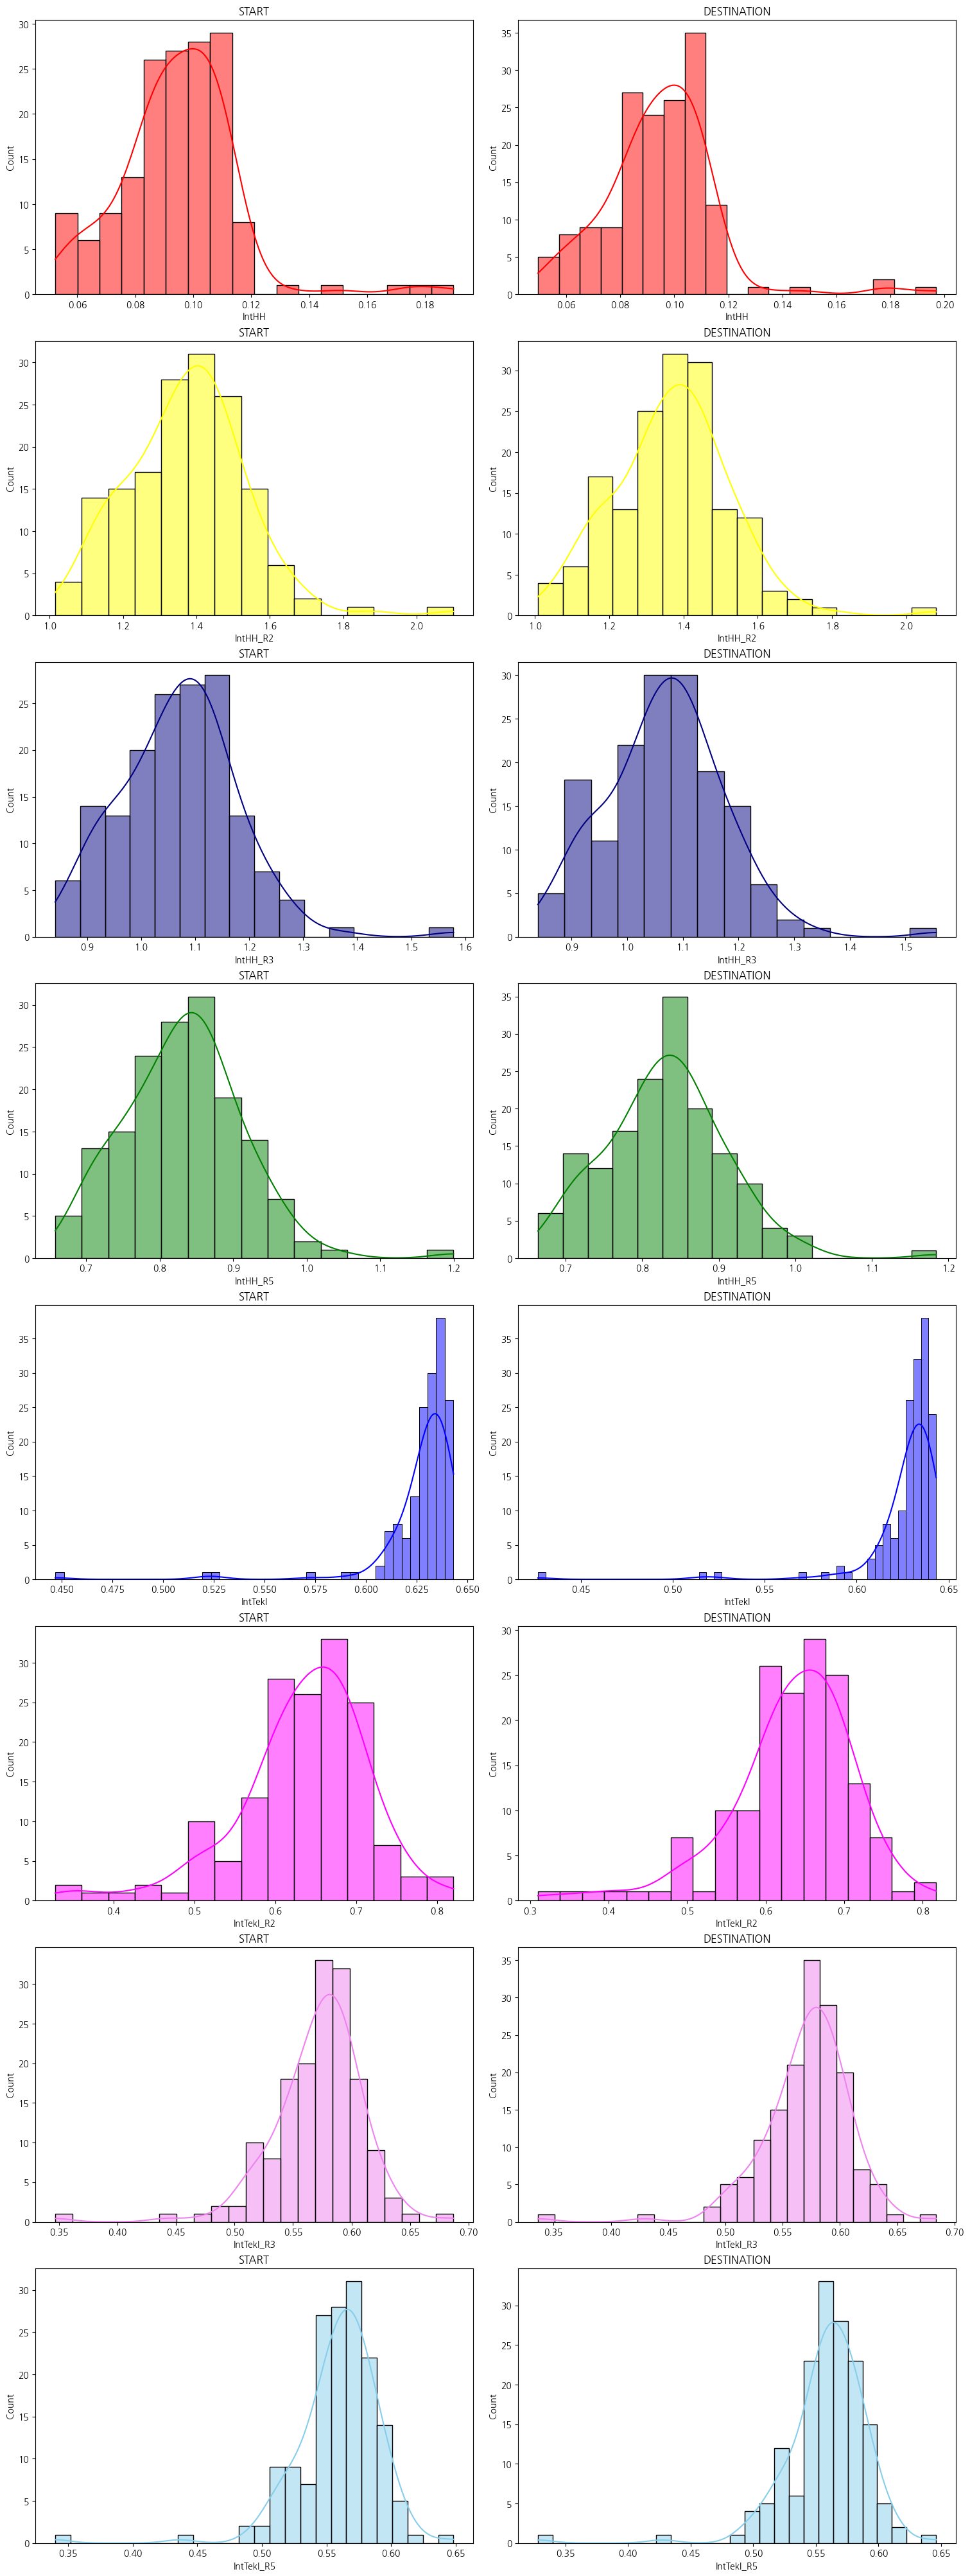

In [36]:
fig, axes = plt.subplots(len(avg_Int_list),2,figsize=(15,40),constrained_layout=True)
color = ['red','yellow','navy','green','blue','magenta','violet','skyblue']

for idx, col in enumerate(avg_Int_list):
    sns.histplot(ax=axes[idx,0],data=avg_of_integration_by_bi1, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,1],data=avg_of_integration_by_bi2, x=col, kde=True,color=color[idx])
    axes[idx,0].set_title('START')
    axes[idx,1].set_title('DESTINATION')
    
plt.show()

In [38]:
sum_of_integration_by_bi1.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/기초구역별_도로별_통합도(결합전)_st.csv')
sum_of_integration_by_bi2.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/기초구역별_도로별_통합도(결합전)_des.csv')
avg_of_integration_by_bi1.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/기초구역별_통합도(평균,결합전)_st.csv')
avg_of_integration_by_bi2.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/기초구역별_통합도(평균,결합전)_des.csv')

# 3. 위치정보와 결합

In [39]:
basic_area = gpd.read_file('./data/전처리 파일/부평구_기초구역_5181/부평구_기초구역_5181.shp')
basic_area

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
0,2.648838,21459,2823700025,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((176641.304 442645.152, 176647.527 44..."
1,0.156212,21384,2823700061,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((174332.882 443549.806, 174341.717 44..."
2,0.076024,21403,2823700058,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((176460.207 443392.656, 176503.040 44..."
3,0.527205,21447,2823700035,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((173371.315 442923.042, 173431.784 44..."
4,0.073898,21421,2823700036,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((176813.663 442559.317, 176802.418 44..."
...,...,...,...,...,...,...,...,...,...,...,...
156,0.055146,21423,2823700022,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((176671.251 442643.859, 176686.836 44..."
157,0.117664,21441,2823700023,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((173892.886 442465.677, 173876.623 44..."
158,0.069431,21446,2823700003,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((173718.851 441369.606, 173717.873 44..."
159,0.093812,21453,2823700004,인천광역시,None,None,20121221,None,28237,부평구,"POLYGON ((173523.162 441167.346, 173522.717 44..."


In [40]:
basic_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BAS_AR      161 non-null    float64 
 1   BAS_ID      161 non-null    object  
 2   BAS_MGT_SN  161 non-null    object  
 3   CTP_KOR_NM  161 non-null    object  
 4   MVMN_DE     0 non-null      object  
 5   MVMN_RESN   0 non-null      object  
 6   NTFC_DE     161 non-null    object  
 7   OPERT_DE    0 non-null      object  
 8   SIG_CD      161 non-null    object  
 9   SIG_KOR_NM  161 non-null    object  
 10  geometry    161 non-null    geometry
dtypes: float64(1), geometry(1), object(9)
memory usage: 14.0+ KB


In [41]:
basic_area.drop(columns={'MVMN_DE','MVMN_RESN','OPERT_DE'},axis=1,inplace=True)

In [42]:
sum_of_integration_by_bi1 = sum_of_integration_by_bi1.astype({'BAS_ID':'object'})
sum_of_integration_by_bi2 = sum_of_integration_by_bi2.astype({'BAS_ID':'object'})
avg_of_integration_by_bi1 = avg_of_integration_by_bi1.astype({'BAS_ID':'object'})
avg_of_integration_by_bi2 = avg_of_integration_by_bi2.astype({'BAS_ID':'object'})

In [43]:
sum_of_integration_by_bi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BAS_ID         161 non-null    object 
 1   IntHH_RI       161 non-null    float64
 2   IntHH_R2_RI    161 non-null    float64
 3   IntHH_R3_RI    161 non-null    float64
 4   IntHH_R5_RI    161 non-null    float64
 5   IntTekl_RI     161 non-null    float64
 6   IntTekl_R2_RI  161 non-null    float64
 7   IntTekl_R3_RI  161 non-null    float64
 8   IntTekl_R5_RI  161 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.4+ KB


In [44]:
result1 = basic_area.merge(sum_of_integration_by_bi1,left_on='BAS_ID',right_on='BAS_ID',how='inner')
result2 = basic_area.merge(sum_of_integration_by_bi2,left_on='BAS_ID',right_on='BAS_ID',how='inner')
result3 = basic_area.merge(avg_of_integration_by_bi1,left_on='BAS_ID',right_on='BAS_ID',how='inner')
result4 = basic_area.merge(avg_of_integration_by_bi2,left_on='BAS_ID',right_on='BAS_ID',how='inner')

result1.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,NTFC_DE,SIG_CD,SIG_KOR_NM,geometry,IntHH_RI,IntHH_R2_RI,IntHH_R3_RI,IntHH_R5_RI,IntTekl_RI,IntTekl_R2_RI,IntTekl_R3_RI,IntTekl_R5_RI
0,2.648838,21459,2823700025,인천광역시,20121221,28237,부평구,"POLYGON ((176641.304 442645.152, 176647.527 44...",85.662698,1494.224111,1189.577180,918.902292,893.949342,444.980096,692.389210,693.289263
1,0.156212,21384,2823700061,인천광역시,20121221,28237,부평구,"POLYGON ((174332.882 443549.806, 174341.717 44...",446.868364,2119.486181,1690.311298,1318.418102,1132.015767,699.788488,948.105392,967.018641
2,0.076024,21403,2823700058,인천광역시,20121221,28237,부평구,"POLYGON ((176460.207 443392.656, 176503.040 44...",120.961122,1327.741806,1098.927652,877.064262,710.370886,578.075798,602.058530,608.277837
3,0.527205,21447,2823700035,인천광역시,20121221,28237,부평구,"POLYGON ((173371.315 442923.042, 173431.784 44...",406.032909,6782.034343,5423.958764,4262.745776,3484.383379,3163.350860,3055.789591,3037.308108
4,0.073898,21421,2823700036,인천광역시,20121221,28237,부평구,"POLYGON ((176813.663 442559.317, 176802.418 44...",237.569576,4205.399417,3291.290674,2587.947034,1755.233165,1821.708572,1684.699455,1654.428685


In [58]:
result1.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/결합후/기초구역별_도로별_통합도(결합후)_st.csv')
result2.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/결합후/기초구역별_도로별_통합도(결합후)_des.csv')
result3.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/결합후/기초구역별_통합도(평균,결합후)_st.csv')
result4.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/결합후/기초구역별_통합도(평균,결합후)_des.csv')

In [46]:
result1.sort_values(by='BAS_ID',axis=0,inplace=True)
result2.sort_values(by='BAS_ID',axis=0,inplace=True)
result3.sort_values(by='BAS_ID',axis=0,inplace=True)
result4.sort_values(by='BAS_ID',axis=0,inplace=True)

In [47]:
avg_integration1 = pd.DataFrame() # 도로길이를 고려한 통합도(st, des 평균)
avg_integration2 = pd.DataFrame() # 기초구역 내 통합도 평균(st, des 평균)

avg_integration1['BAS_ID'] = result1['BAS_ID']
avg_integration1['geometry'] = result1['geometry']

avg_integration2['BAS_ID'] = result1['BAS_ID']
avg_integration2['geometry'] = result1['geometry']

In [48]:
print(Int_list)

Index(['IntHH_RI', 'IntHH_R2_RI', 'IntHH_R3_RI', 'IntHH_R5_RI', 'IntTekl_RI',
       'IntTekl_R2_RI', 'IntTekl_R3_RI', 'IntTekl_R5_RI'],
      dtype='object')


In [51]:
col_list = [Int_list, avg_Int_list]

for i, cl in enumerate(col_list):
    print(cl)
    for col in cl:
        if i == 0:
            avg_integration1['avg_'+col] = (result1[col] + result2[col]) / 2
        elif i == 1:
            avg_integration2['avg_'+col] = (result3[col] + result4[col]) / 2

display(avg_integration1.head())
display(avg_integration2.head())

Index(['IntHH_RI', 'IntHH_R2_RI', 'IntHH_R3_RI', 'IntHH_R5_RI', 'IntTekl_RI',
       'IntTekl_R2_RI', 'IntTekl_R3_RI', 'IntTekl_R5_RI'],
      dtype='object')
Index(['IntHH', 'IntHH_R2', 'IntHH_R3', 'IntHH_R5', 'IntTekl', 'IntTekl_R2',
       'IntTekl_R3', 'IntTekl_R5'],
      dtype='object')


,BAS_ID,geometry,avg_IntHH_RI,avg_IntHH_R2_RI,avg_IntHH_R3_RI,avg_IntHH_R5_RI,avg_IntTekl_RI,avg_IntTekl_R2_RI,avg_IntTekl_R3_RI,avg_IntTekl_R5_RI
139,21300,"POLYGON ((172624.863 447152.276, 172670.940 44...",573.442249,9138.977416,7351.204765,5803.064497,4918.111889,2899.841473,3984.881259,4117.678277
143,21301,"POLYGON ((173295.105 447039.530, 173295.147 44...",198.793338,3242.102386,2596.217866,2031.809302,1647.528094,1613.397172,1461.506294,1432.671968
134,21302,"POLYGON ((173891.544 446881.024, 173891.543 44...",306.145712,4620.604685,3644.122198,2837.098443,2174.469830,2085.654785,1944.224999,1926.403621
131,21303,"POLYGON ((173668.839 446507.436, 173658.833 44...",408.049309,6647.224696,5189.631366,4056.147967,2918.246130,2677.002139,2666.954128,2651.686459
133,21304,"POLYGON ((173891.543 446881.019, 173891.500 44...",185.567466,2915.796888,2254.391614,1745.699145,1249.059809,1295.370887,1157.503028,1129.941325


,BAS_ID,geometry,avg_IntHH,avg_IntHH_R2,avg_IntHH_R3,avg_IntHH_R5,avg_IntTekl,avg_IntTekl_R2,avg_IntTekl_R3,avg_IntTekl_R5
139,21300,"POLYGON ((172624.863 447152.276, 172670.940 44...",0.059062,1.145128,0.910644,0.710392,0.607139,0.491864,0.511498,0.512151
143,21301,"POLYGON ((173295.105 447039.530, 173295.147 44...",0.069193,1.176128,0.929250,0.719206,0.620698,0.623220,0.537743,0.523686
134,21302,"POLYGON ((173891.544 446881.024, 173891.543 44...",0.087669,1.393192,1.071757,0.820514,0.630408,0.674768,0.579012,0.559074
131,21303,"POLYGON ((173668.839 446507.436, 173658.833 44...",0.087190,1.418305,1.095781,0.849199,0.630187,0.595304,0.572431,0.564202
133,21304,"POLYGON ((173891.543 446881.019, 173891.500 44...",0.092506,1.356000,1.060653,0.822682,0.632691,0.648888,0.572613,0.557535


In [52]:
avg_integration1.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 평균/기초구역별_도로별_통합도(평균).csv')
avg_integration2.to_csv('./data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 평균/기초구역별_통합도(평균).csv')

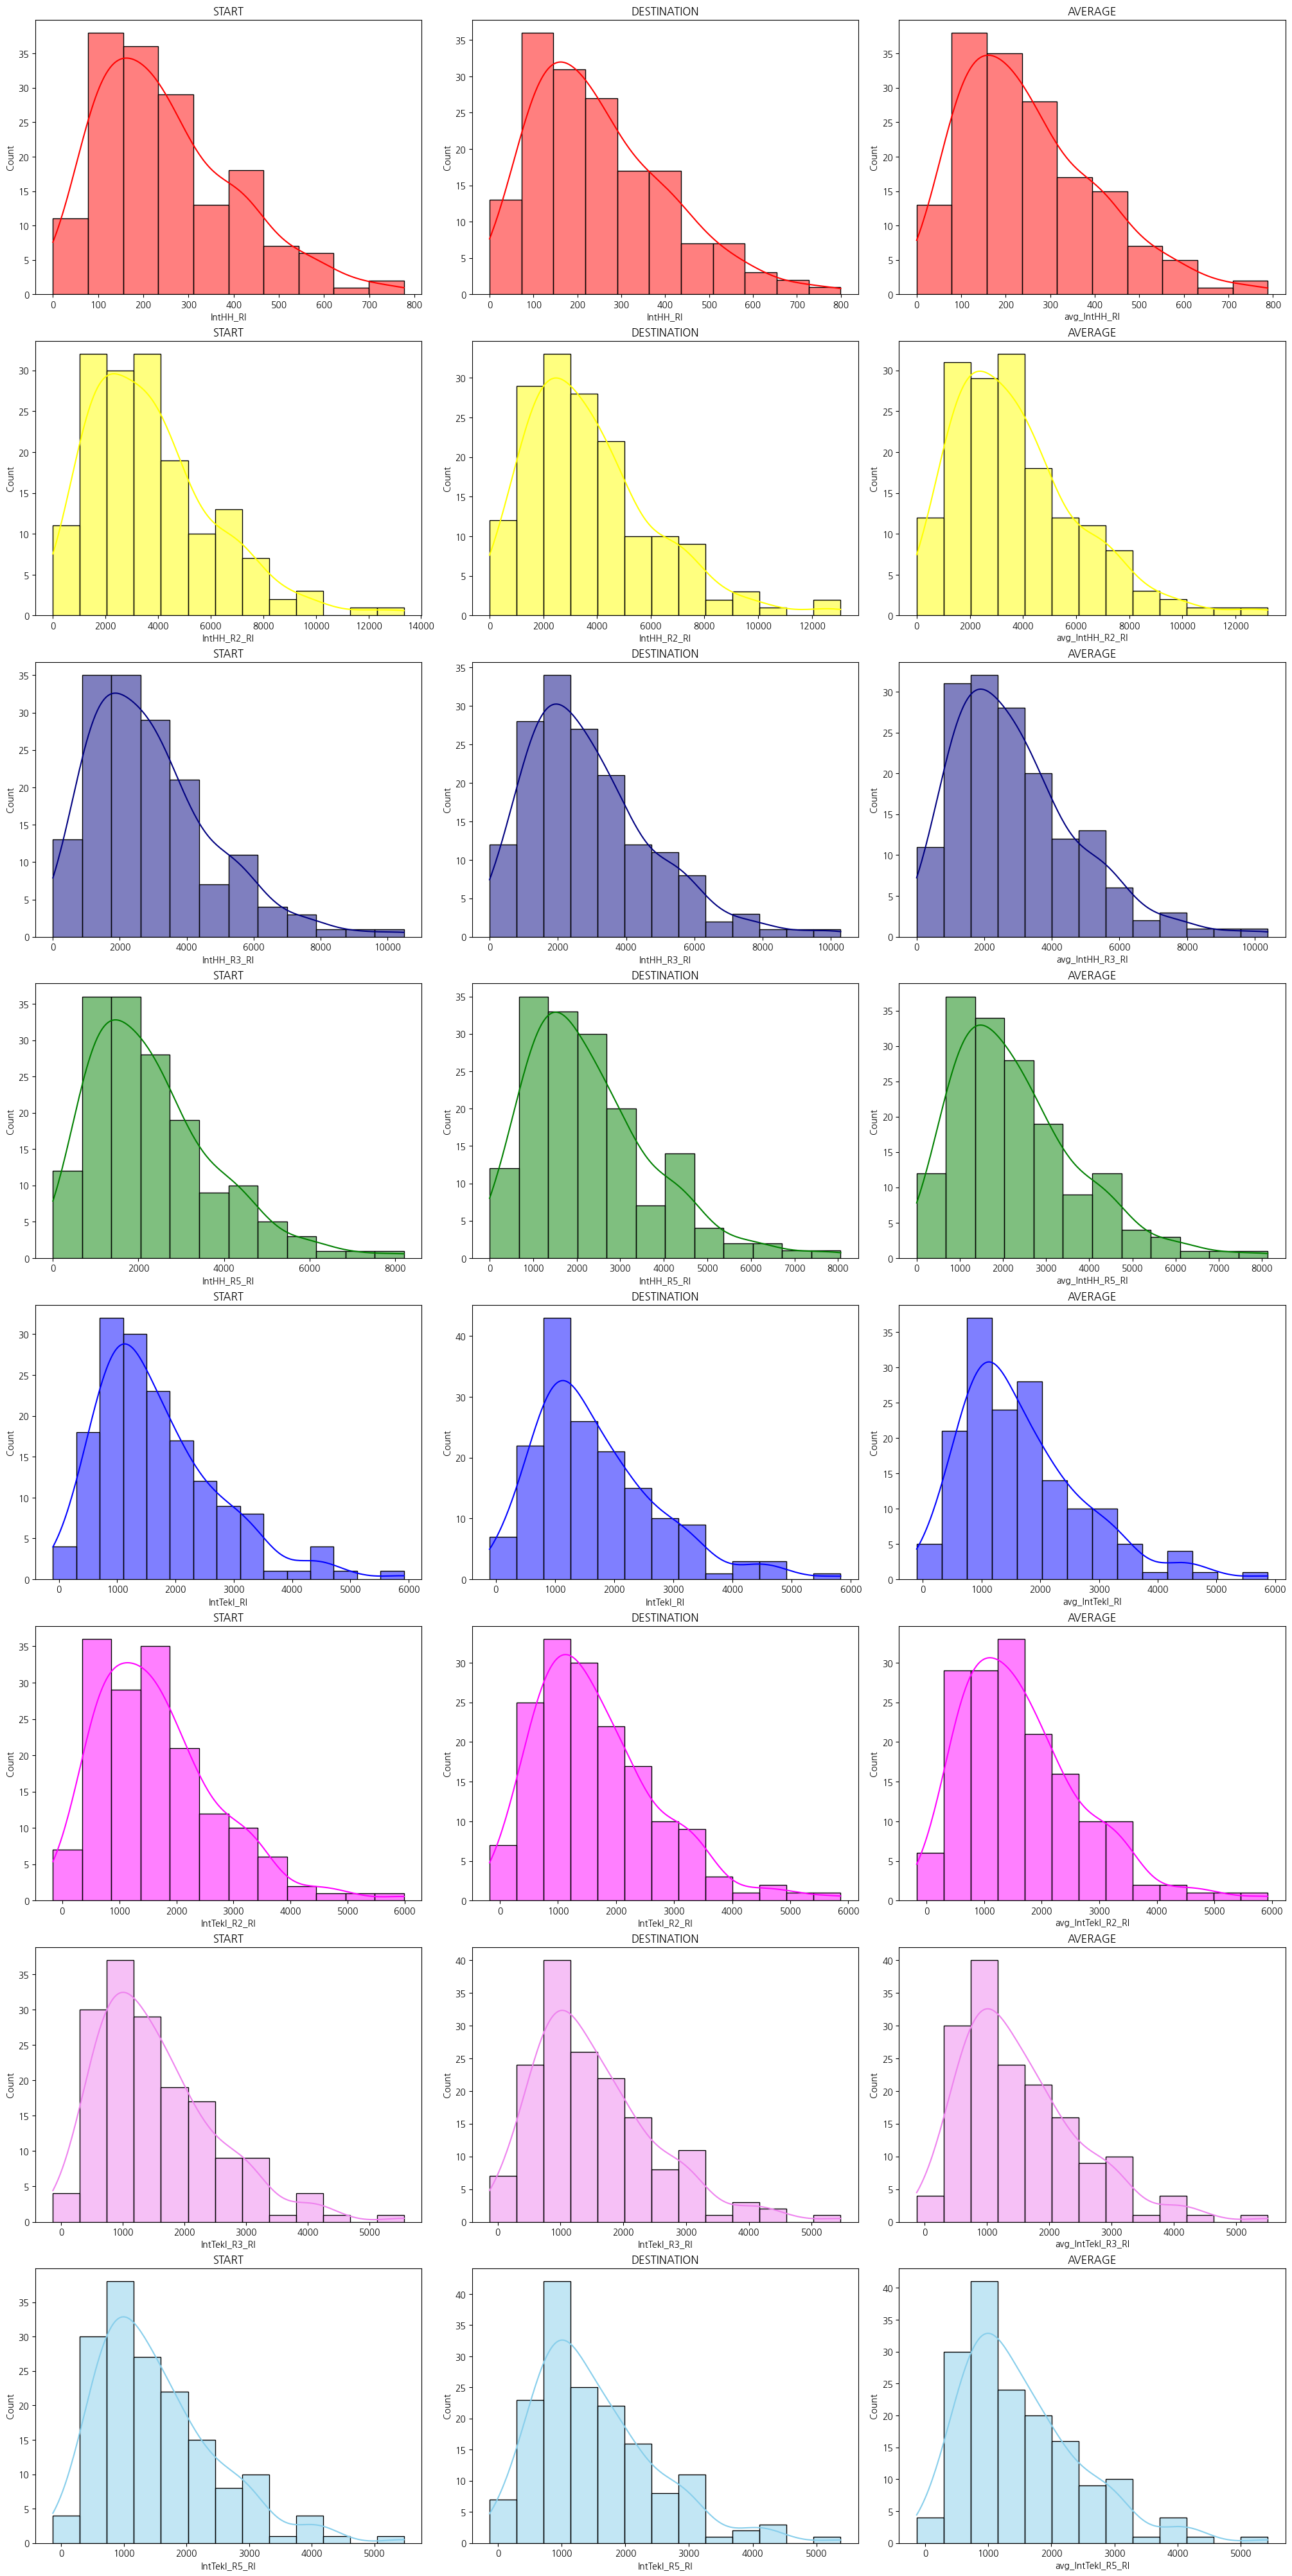

In [53]:
fig, axes = plt.subplots(len(Int_list),3,figsize=(20,40),constrained_layout=True)
color = ['red','yellow','navy','green','blue','magenta','violet','skyblue']

for idx, col in enumerate(Int_list):
    sns.histplot(ax=axes[idx,0],data=sum_of_integration_by_bi1, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,1],data=sum_of_integration_by_bi2, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,2],data=avg_integration1, x='avg_'+col, kde=True,color=color[idx])
    axes[idx,0].set_title('START')
    axes[idx,1].set_title('DESTINATION')
    axes[idx,2].set_title('AVERAGE')
    
plt.show()

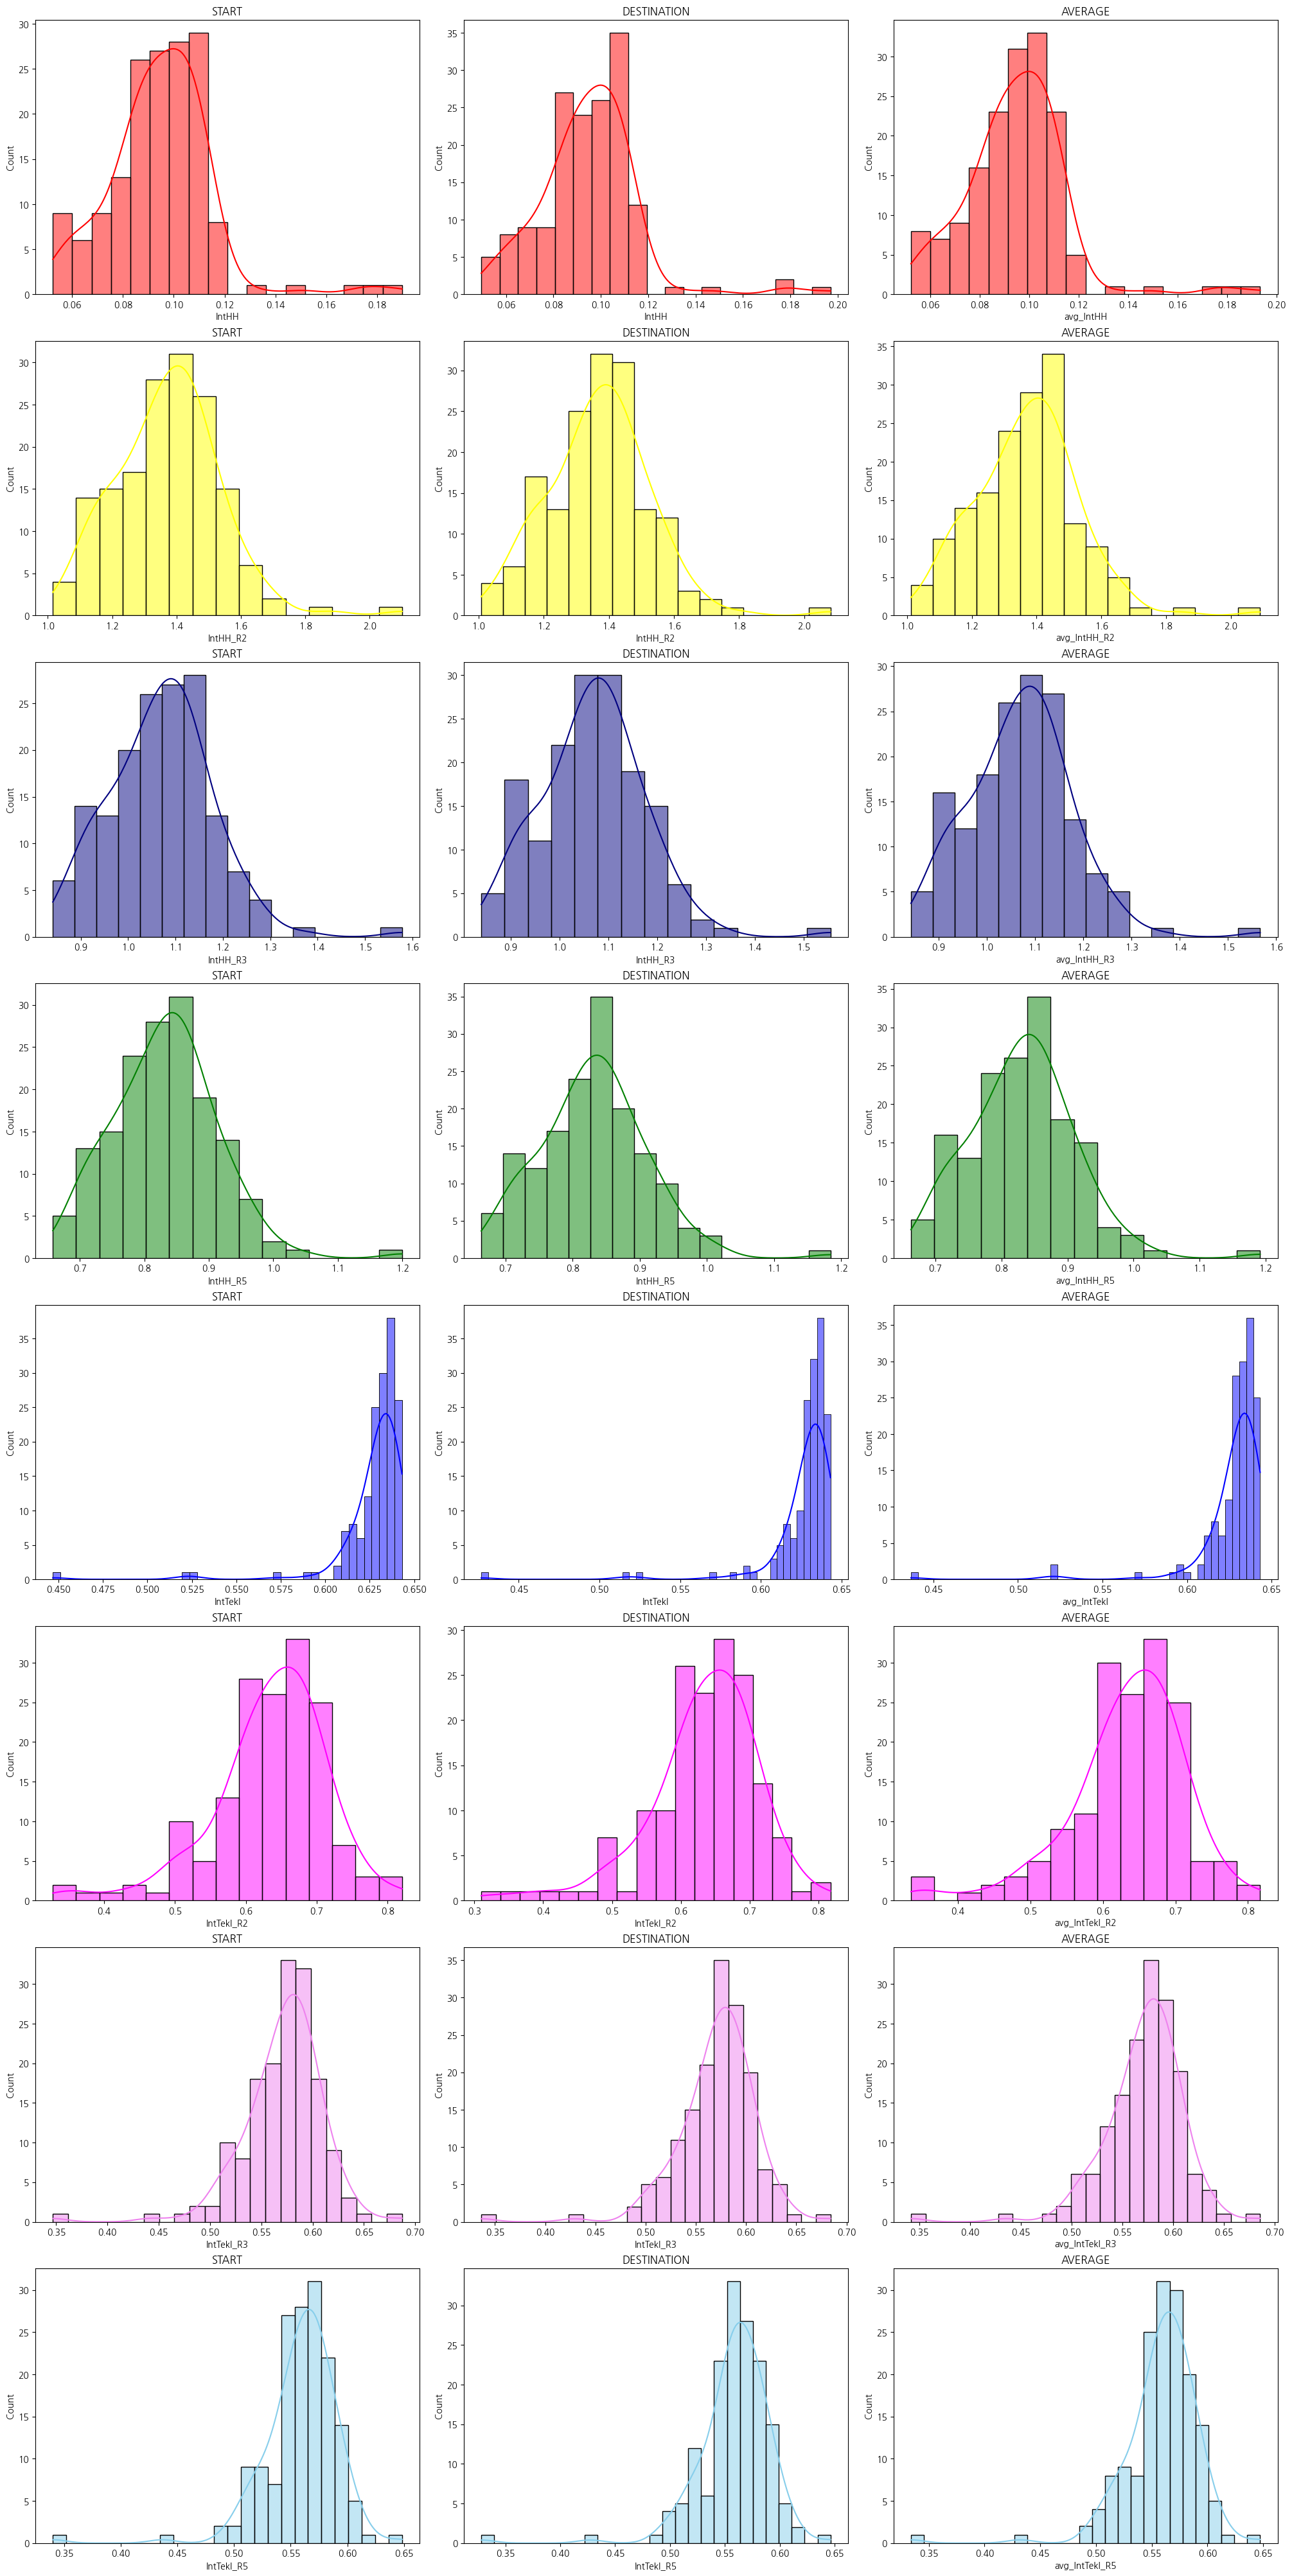

In [57]:
fig, axes = plt.subplots(len(avg_Int_list),3,figsize=(20,40),constrained_layout=True)
color = ['red','yellow','navy','green','blue','magenta','violet','skyblue']

for idx, col in enumerate(avg_Int_list):
    sns.histplot(ax=axes[idx,0],data=avg_of_integration_by_bi1, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,1],data=avg_of_integration_by_bi2, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,2],data=avg_integration2, x='avg_'+col, kde=True,color=color[idx])
    axes[idx,0].set_title('START')
    axes[idx,1].set_title('DESTINATION')
    axes[idx,2].set_title('AVERAGE')

plt.show()

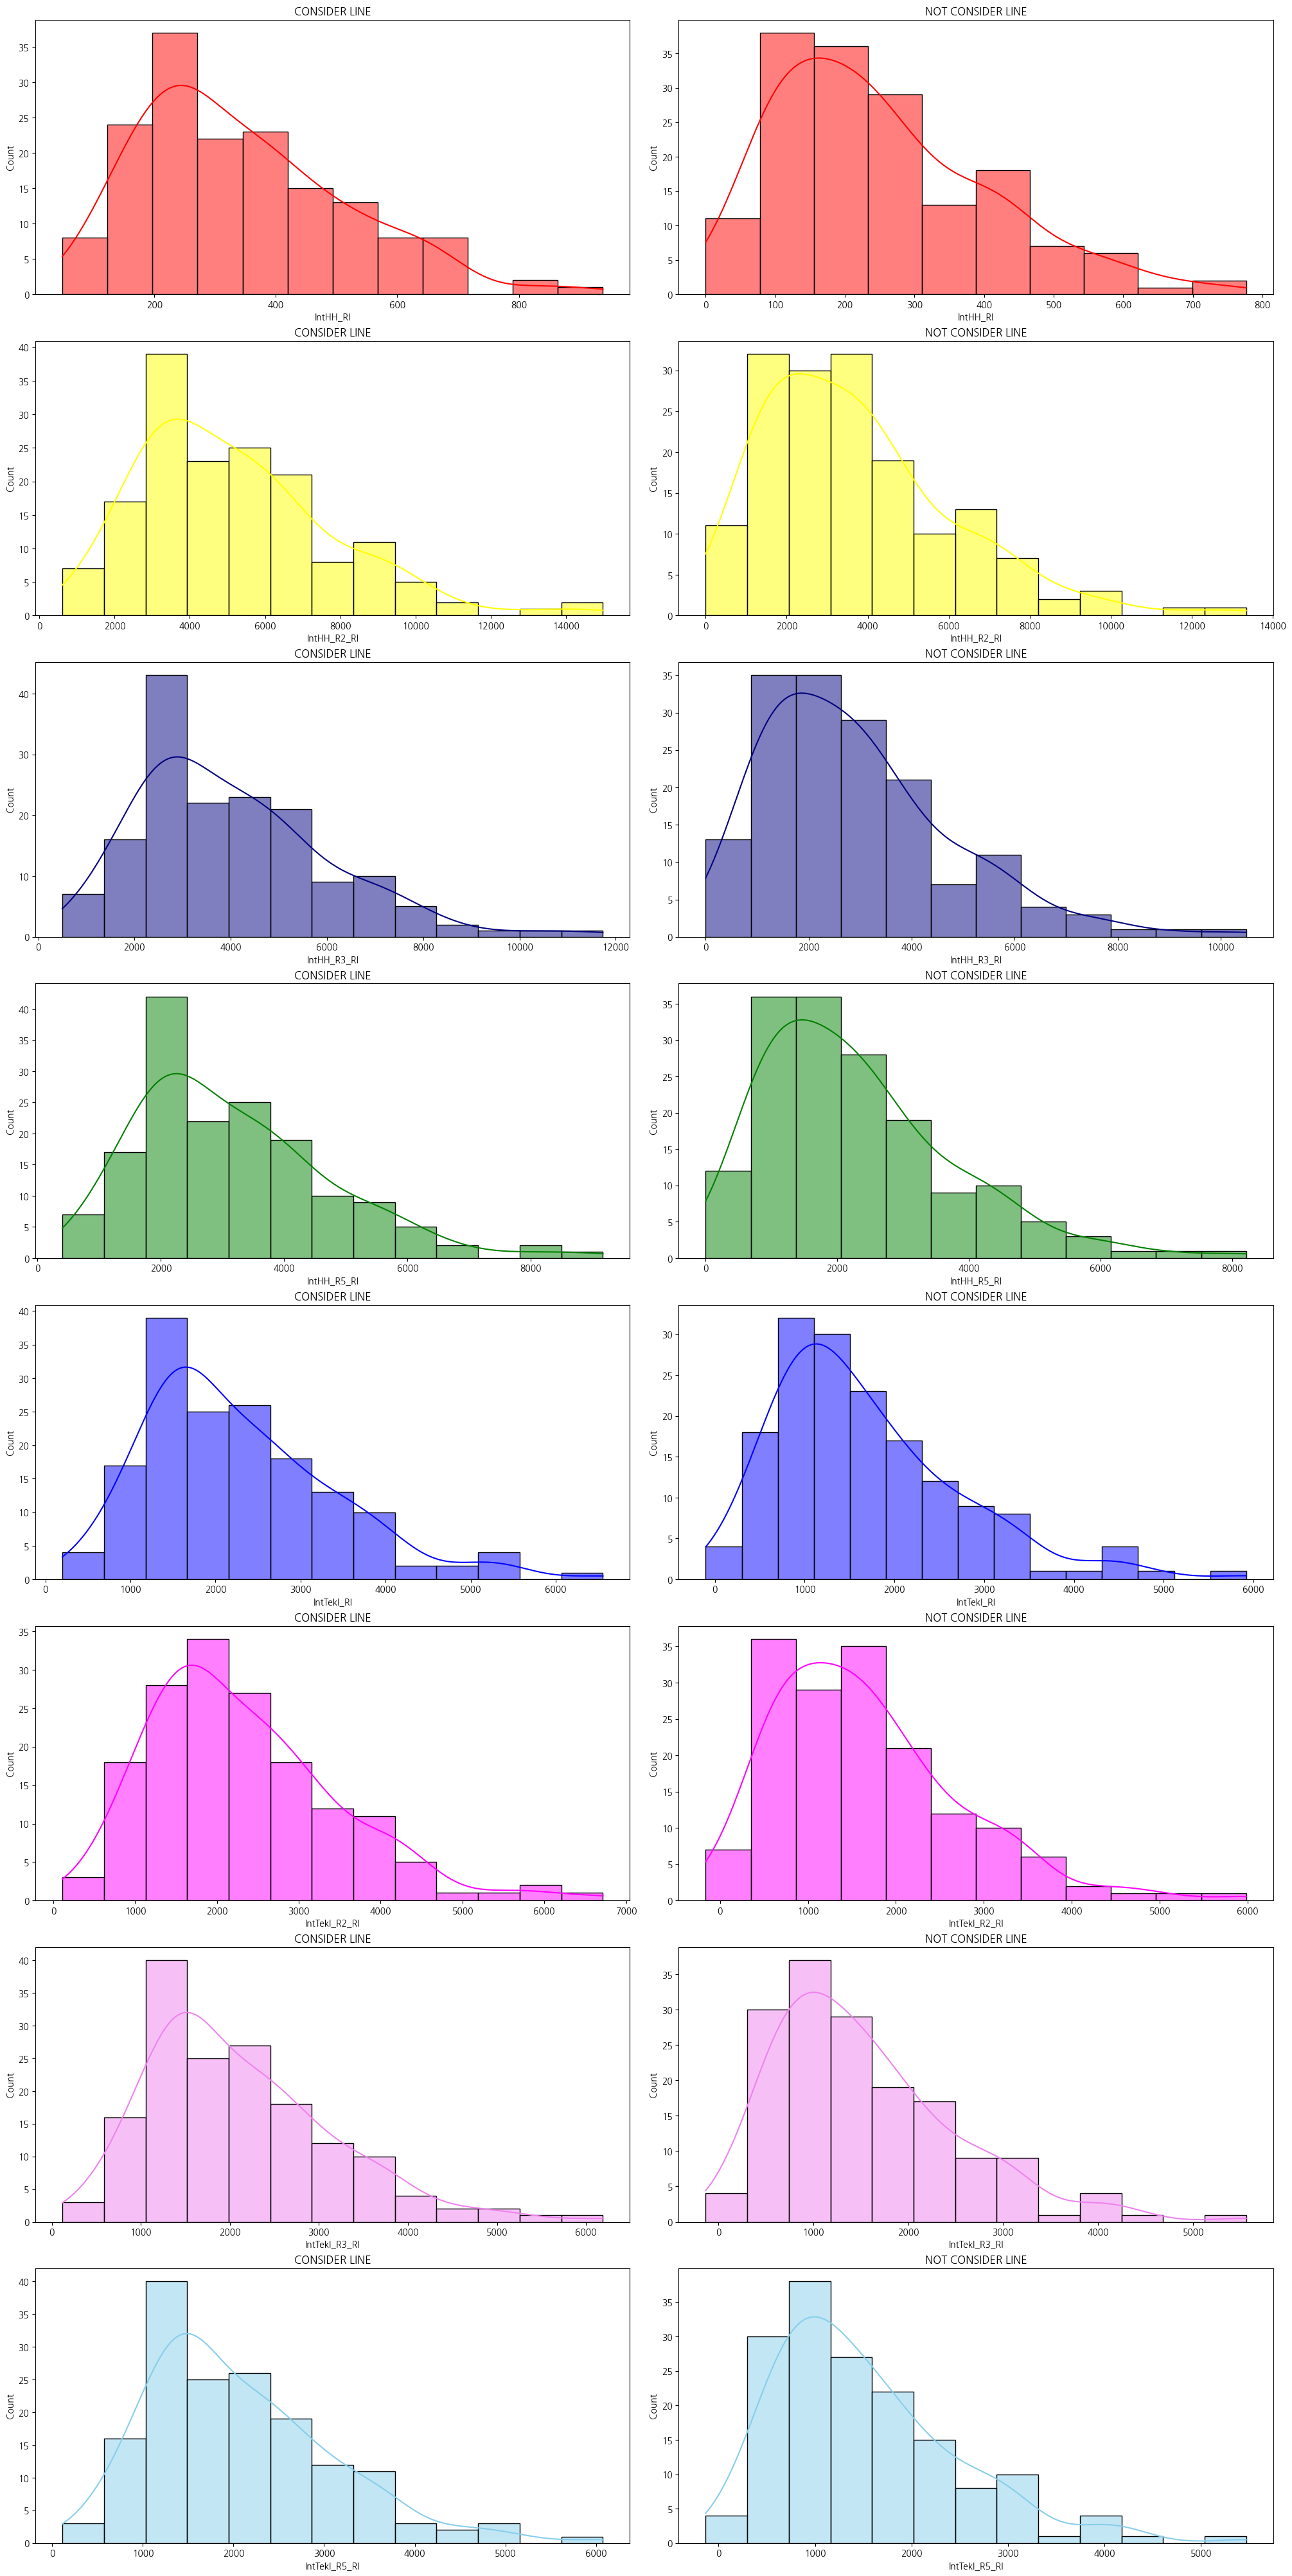

In [29]:
path = r'C:/Data Analysis/부평구 상권분석/data/전처리 파일/부평구 도로_5181/3. 기초구역별 도로통합도/기초구역별 통합도 집계 후/start/결합후/'
df = pd.read_csv(path+'기초구역별_도로별_통합도(라인인접고려,결합후)_st_5181.csv')

fig, axes = plt.subplots(len(Int_list),2,figsize=(20,40),constrained_layout=True)
color = ['red','yellow','navy','green','blue','magenta','violet','skyblue']

for idx, col in enumerate(Int_list):
    sns.histplot(ax=axes[idx,0],data=df, x=col, kde=True,color=color[idx])
    sns.histplot(ax=axes[idx,1],data=sum_of_integration_by_bi1, x=col, kde=True,color=color[idx])
    axes[idx,0].set_title('CONSIDER LINE')
    axes[idx,1].set_title('NOT CONSIDER LINE')

plt.show()